In [11]:
class NumericalIntegration:
    def midpoint_rule(self, f, a, b, dx):
        n = int((b - a) / dx)
        result = 0.0
        for i in range(n):
            x_mid = a + (i + 0.5) * dx
            result += f(x_mid) * dx
        return result
    
    def trapezoidal_rule(self, f, a, b, dx):
        n = int((b - a) / dx)
        result = 0.5 * (f(a) + f(b))
        for i in range(1, n):
            x = a + i * dx
            result += f(x)
        result *= dx
        return result
    
    def simpsons_rule(self, f, a, b, dx):
        n = int((b - a) / dx)
        if n % 2 == 1:  # Simpson's rule requires an even number of intervals
            n += 1
            dx = (b - a) / n
        
        result = f(a) + f(b)
        for i in range(1, n, 2):
            x = a + i * dx
            result += 4 * f(x)
        for i in range(2, n-1, 2):
            x = a + i * dx
            result += 2 * f(x)
        
        result *= dx / 3
        return result

    def legendre_polynomial(self, m):
        return np.polynomial.legendre.Legendre.basis(m)

    def GaussWeights(self, m, tol=1e-10, max_iter=100):
        Pm = self.legendre_polynomial(m)
        Pm_deriv = Pm.deriv()
        
        roots = np.cos(np.pi * (np.arange(m) + 0.75) / (m + 0.5))  # Initial guesses
        
        for _ in range(max_iter):
            Pm_vals = Pm(roots)
            Pm_deriv_vals = Pm_deriv(roots)
            new_roots = roots - Pm_vals / Pm_deriv_vals
            if np.max(np.abs(new_roots - roots)) < tol:
                break
            roots = new_roots
        
        weights = 2 / ((1 - roots**2) * (Pm_deriv(roots))**2)
        return roots, weights
    
    def GaussQuad(self, roots, weights, f, a, b):
        integral = (b - a) / 2 * sum(weights[i] * f((b - a) * roots[i] / 2 + (a + b) / 2) for i in range(len(roots)))
        return integral
        

# Example usage:
def example_function(x):
    return x**2

integrator = NumericalIntegration()
a, b, dx = 0, 1, 0.1
print("Midpoint Rule:", integrator.midpoint_rule(example_function, a, b, dx))
print("Trapezoidal Rule:", integrator.trapezoidal_rule(example_function, a, b, dx))
print("Simpson's Rule:", integrator.simpsons_rule(example_function, a, b, dx))




Midpoint Rule: 0.3325
Trapezoidal Rule: 0.3350000000000001
Simpson's Rule: 0.3333333333333334


C) I'm a bit confused by the notation here. Why are we making a variable change into the same variable? That's like saying 5x=x.

But I think the conclusion makes sense, we get a multiplicative factor out front because we scaled our bounds of integration.

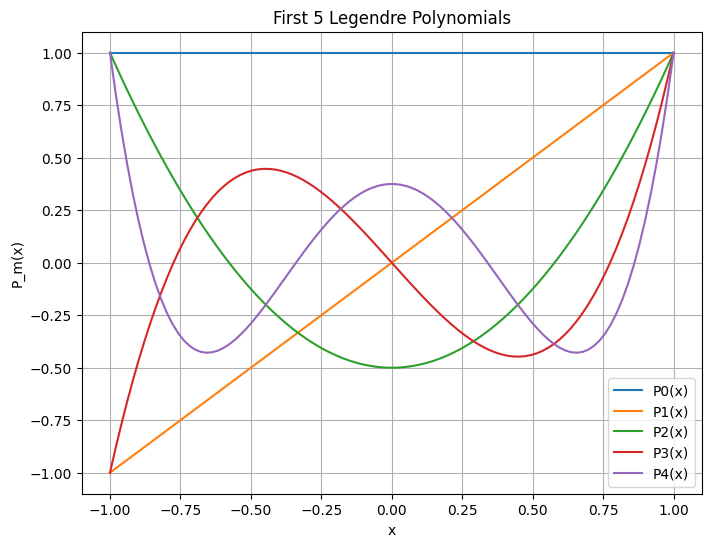

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate and plot the first 5 Legendre polynomials
x = np.linspace(-1, 1, 100)
plt.figure(figsize=(8, 6))
for m in range(5):
    Pm = np.polynomial.legendre.Legendre.basis(m)
    plt.plot(x, Pm(x), label=f'P{m}(x)')

plt.xlabel("x")
plt.ylabel("P_m(x)")
plt.title("First 5 Legendre Polynomials")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import scipy

for i in range(1, 6):
    roots, weights = integrator.GaussWeights(m=i)
    roots_scipy, weights_scipy = scipy.special.roots_legendre(i)
    
    print(f"m = {i}")
    print(f"My Roots:      {roots}")
    print(f"Scipy Roots:   {roots_scipy}")
    print(f"My Weights:    {weights}")
    print(f"Scipy Weights: {weights_scipy}")
    print("-" * 40)


m = 1
My Roots:      [6.123234e-17]
Scipy Roots:   [0.]
My Weights:    [2.]
Scipy Weights: [2.]
----------------------------------------
m = 2
My Roots:      [ 0.57735027 -0.57735027]
Scipy Roots:   [-0.57735027  0.57735027]
My Weights:    [1. 1.]
Scipy Weights: [1. 1.]
----------------------------------------
m = 3
My Roots:      [ 0.77459667  0.         -0.77459667]
Scipy Roots:   [-0.77459667  0.          0.77459667]
My Weights:    [0.55555556 0.88888889 0.55555556]
Scipy Weights: [0.55555556 0.88888889 0.55555556]
----------------------------------------
m = 4
My Roots:      [ 0.86113631  0.33998104 -0.33998104 -0.86113631]
Scipy Roots:   [-0.86113631 -0.33998104  0.33998104  0.86113631]
My Weights:    [0.34785485 0.65214515 0.65214515 0.34785485]
Scipy Weights: [0.34785485 0.65214515 0.65214515 0.34785485]
----------------------------------------
m = 5
My Roots:      [ 0.90617985  0.53846931  0.         -0.53846931 -0.90617985]
Scipy Roots:   [-0.90617985 -0.53846931  0.          

Task 2:

Example usage of Gaussian Quadrature


In [17]:
# Example usage:
def example_function(x):
    return x**4

# Example usage of Gaussian Quadrature
roots, weights = integrator.GaussWeights(1)
print("Gaussian Quadrature Integral:", integrator.GaussQuad(roots, weights, example_function, a, b))

roots, weights = integrator.GaussWeights(2)
print("Gaussian Quadrature Integral:", integrator.GaussQuad(roots, weights, example_function, a, b))

roots, weights = integrator.GaussWeights(3)
print("Gaussian Quadrature Integral:", integrator.GaussQuad(roots, weights, example_function, a, b))

Gaussian Quadrature Integral: 0.0625
Gaussian Quadrature Integral: 0.19444444444444445
Gaussian Quadrature Integral: 0.19999999999999973
